# 클러스터링이란?
- 유사한 데이터들을 같은 클러스터(집단)로 묶어 주는 작업을 클러스터링이라고 합니다. 우리말로는 군집화라고 하는데요.

#### 클러스터링의 원리
- 유사한 데이터(거리가 가까운 데이터)는 같은 클러스터로 묶는다.
- 유사하지 않은 데이터(거리가 먼 데이터)는 다른 클러스터로 묶는다.

In [63]:
# 모바일 어플리케이션 유저 500명의 월 방문 횟수(visit_per_month)와 사용 시간(use_time) 데이터
import pandas as pd
user_df = pd.read_csv('data/app_users.csv', index_col = 0)
user_df.head()

,visit_per_month,use_time
0,14,22.8
1,32,13.6
2,8,3.1
3,13,5.7
4,19,20.8


In [65]:
# 클러스터링
from sklearn.cluster import KMeans

# n_clusters: n개의 클러스터로 데이터를 나누겠다는 의미
# random_state: 초기 클러스터 중심의 위치를 무작위로 선택되는데 이러한 무작위성을 통제할 수 있다.
model = KMeans(n_clusters=3, random_state=20)
model.fit(user_df)

# 클러스터 구분
user_df['label'] = model.predict(user_df)

# 클러스터별 속한 유저 수
user_df.groupby('label').count()

,visit_per_month,use_time
label,,
0,228,228
1,146,146
2,126,126


<Axes: xlabel='visit_per_month', ylabel='use_time'>

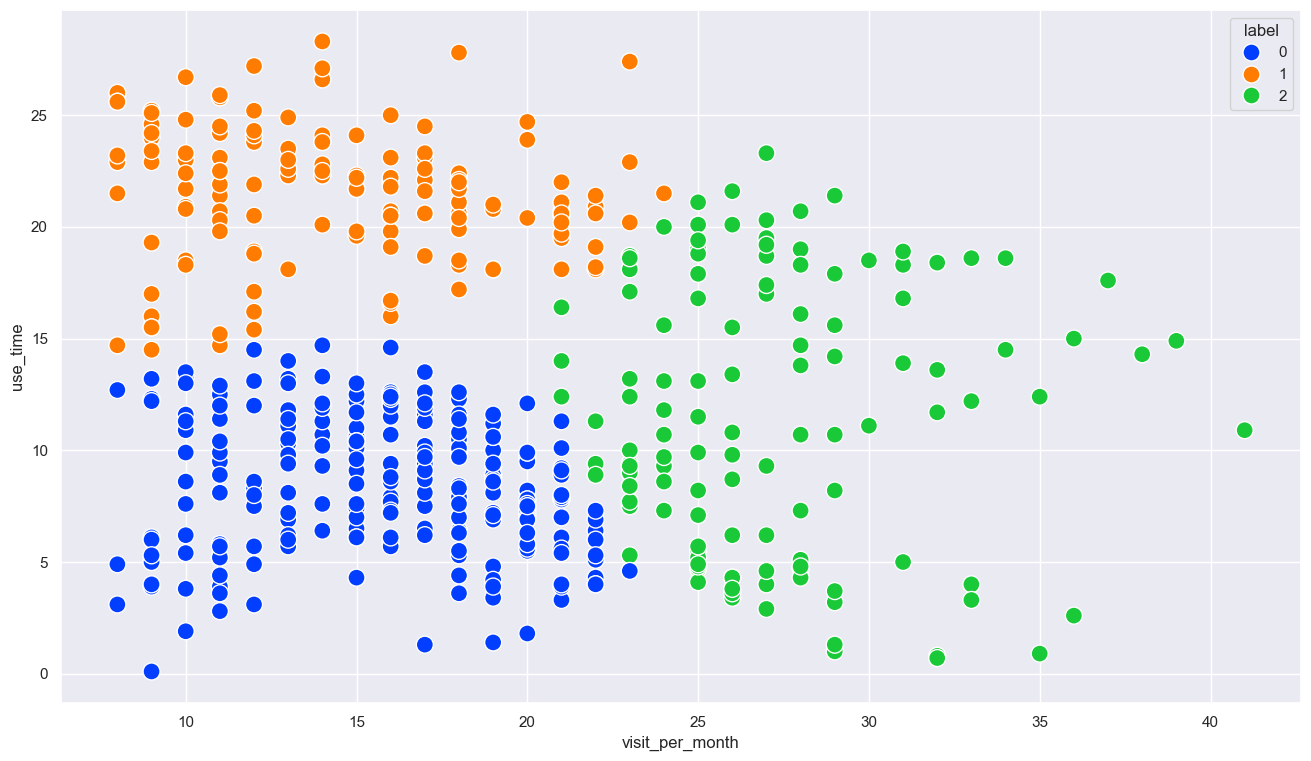

In [66]:
# 시각화
import seaborn as sns
sns.scatterplot(x='visit_per_month', y='use_time', data=user_df, hue=user_df['label'], s = 150, palette='bright')

#### 각 클러스터의 특징 분석
- 클러스터 0(파랑색)은 방문 횟수와 사용 시간이 둘 다 적음, 따라서 앱을 많이 사용하지 않고 있다고 볼 수 있다.
- 클러스터 1(주황색)은 방문 횟수는 많지만 사용 시간이 적다고 볼 수 있다.
- 클러스터 2(초록색)은 앱을 사용하는 시간은 많지만 방문횟수는 적다고 볼수 있다.